In [334]:
import pandas as pd

In [335]:
temp =pd.read_csv("data.csv")

In [336]:
temp

,Year;Month;Day;Hour;Minute;Temperature[2mabovegnd];TotalPrecipitation(highresolution)[sfc];WindSpeed[10mabovegnd];WindDirection[10mabovegnd]
0,2020;03;03;00;00;23.54;0.00;2.19;350.54
1,2020;03;03;01;00;22.97;0.00;3.24;360.00
2,2020;03;03;02;00;22.36;0.00;4.68;360.00
3,2020;03;03;03;00;21.82;0.00;6.13;3.37
4,2020;03;03;04;00;21.29;0.00;7.34;11.31
...,...
187,2020;03;10;19;00;25.15;0.00;9.69;291.80
188,2020;03;10;20;00;24.65;0.00;8.37;295.46
189,2020;03;10;21;00;24.34;0.00;7.57;295.35
190,2020;03;10;22;00;24.07;0.00;6.76;295.20


In [337]:
# first get all lines from file
with open('data.csv', 'r') as f:
    lines = f.readlines()

# remove spaces
lines = [line.replace(';', ',') for line in lines]

# finally, write lines in the file
with open('temp.csv', 'w') as f:
    f.writelines(lines)

In [349]:
temp =pd.read_csv("temp.csv")

In [350]:
temp

,Year,Month,Day,Hour,Minute,Temperature[2mabovegnd],TotalPrecipitation(highresolution)[sfc],WindSpeed[10mabovegnd],WindDirection[10mabovegnd]
0,2020,3,3,0,0,23.54,0.0,2.19,350.54
1,2020,3,3,1,0,22.97,0.0,3.24,360.00
2,2020,3,3,2,0,22.36,0.0,4.68,360.00
3,2020,3,3,3,0,21.82,0.0,6.13,3.37
4,2020,3,3,4,0,21.29,0.0,7.34,11.31
...,...,...,...,...,...,...,...,...,...
187,2020,3,10,19,0,25.15,0.0,9.69,291.80
188,2020,3,10,20,0,24.65,0.0,8.37,295.46
189,2020,3,10,21,0,24.34,0.0,7.57,295.35
190,2020,3,10,22,0,24.07,0.0,6.76,295.20


In [351]:
data = temp.drop(['Year',"Month","Day","Hour","Minute","TotalPrecipitation(highresolution)[sfc]"], axis=1)

In [352]:
data

,Temperature[2mabovegnd],WindSpeed[10mabovegnd],WindDirection[10mabovegnd]
0,23.54,2.19,350.54
1,22.97,3.24,360.00
2,22.36,4.68,360.00
3,21.82,6.13,3.37
4,21.29,7.34,11.31
...,...,...,...
187,25.15,9.69,291.80
188,24.65,8.37,295.46
189,24.34,7.57,295.35
190,24.07,6.76,295.20


In [353]:
temp = data.rename(columns={'Temperature[2mabovegnd]': 'temp', 'WindSpeed[10mabovegnd]': 'WindSpeed','WindDirection[10mabovegnd]':'WindDirection'})


In [354]:
temp

,temp,WindSpeed,WindDirection
0,23.54,2.19,350.54
1,22.97,3.24,360.00
2,22.36,4.68,360.00
3,21.82,6.13,3.37
4,21.29,7.34,11.31
...,...,...,...
187,25.15,9.69,291.80
188,24.65,8.37,295.46
189,24.34,7.57,295.35
190,24.07,6.76,295.20


In [355]:
temp.isnull().any()

temp             False
WindSpeed        False
WindDirection    False
dtype: bool

In [345]:
temp_y = temp.pop('temp')
temp_x = temp

In [356]:
temp_x

,WindSpeed,WindDirection
0,2.19,350.54
1,3.24,360.00
2,4.68,360.00
3,6.13,3.37
4,7.34,11.31
...,...,...
187,9.69,291.80
188,8.37,295.46
189,7.57,295.35
190,6.76,295.20


In [357]:
import os
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [358]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression

import tensorflow as tf
from tensorflow import keras
from sklearn import preprocessing

In [366]:
train_x,test_x,train_y,test_y = train_test_split(temp_x,temp_y,test_size=0.2,random_state=4)

In [367]:
train_x.shape,test_x.shape

((153, 2), (39, 2))

In [368]:
train_x

,WindSpeed,WindDirection
26,6.92,308.66
80,6.29,203.63
190,6.76,295.20
113,17.90,285.15
105,6.16,6.71
...,...,...
104,7.57,25.35
129,9.01,357.71
183,16.90,296.57
174,3.56,45.00


In [369]:
test_x = test_x.reset_index(drop=True)
train_x = train_x.reset_index(drop=True)

In [370]:
train_x

,WindSpeed,WindDirection
0,6.92,308.66
1,6.29,203.63
2,6.76,295.20
3,17.90,285.15
4,6.16,6.71
...,...,...
148,7.57,25.35
149,9.01,357.71
150,16.90,296.57
151,3.56,45.00


In [371]:
train_y.shape,test_y.shape

((153,), (39,))

In [382]:
model1 = LinearRegression()
model1.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [383]:
prediction = model1.predict(test_x)

In [448]:
Linear_error = np.mean((prediction - test_y)**2)

In [449]:
model1_prd = pd.DataFrame({"actual" : test_y, "predicted": prediction, "difference": (prediction - test_y)})
model1_prd = model1_prd.reset_index(drop=True)
# model1_prd
linear_predition = model1_prd.pop("predicted")

In [451]:
from sklearn.preprocessing import PolynomialFeatures

In [452]:
poly = PolynomialFeatures()
x_poly = poly.fit_transform(train_x)

In [453]:
poly.fit(x_poly,train_x)
lin1 = LinearRegression()
lin1.fit(x_poly,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [454]:
prediction2 = lin1.predict(poly.fit_transform(test_x))

In [455]:
poly_error = np.mean((prediction2 - test_y)**2)

In [457]:
model2_prd = pd.DataFrame({"actual" : test_y, "predicted": prediction2, "difference": (prediction2 - test_y)})
model2_prd = model2_prd.reset_index(drop=True)
# model2_prd
poly_predition = model2_prd.pop("predicted")

In [458]:
from sklearn.tree import DecisionTreeRegressor

In [459]:
tree = DecisionTreeRegressor(random_state =4)
tree.fit(train_x,train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=4, splitter='best')

In [461]:
prediction3 = tree.predict(test_x)
tree_error = np.mean((prediction3 - test_y)**2)

In [464]:
model3_prd = pd.DataFrame({"actual" : test_y, "predicted": prediction3, "difference": (prediction3 - test_y)})
model3_prd = model3_prd.reset_index(drop=True)
# model3_prd
tree_predition = model3_prd.pop("predicted")

In [465]:
from sklearn.ensemble import RandomForestRegressor

In [466]:
rfr1 = RandomForestRegressor(max_depth = 4, random_state=0,n_estimators=100)
rfr1.fit(train_x,train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [467]:
prediction4 = rfr1.predict(test_x)
rfr_1st_model_error = np.mean((prediction4 - test_y)**2)

In [468]:
model4_prd = pd.DataFrame({"actual" : test_y, "predicted": prediction4, "difference": (prediction4 - test_y)})
model4_prd = model4_prd.reset_index(drop=True)
# model4_prd
rfr_1st_model_predition = model4_prd.pop("predicted")

In [495]:
rfr2 = RandomForestRegressor(max_depth = 3, random_state=0,n_estimators=100)
rfr2.fit(train_x,train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [496]:
prediction5 = rfr2.predict(test_x)
rfr_2nd_model_error = np.mean((prediction5 - test_y)**2)

In [497]:
rfr_2nd_model_error

0.9014394901974699

In [498]:
model5_prd = pd.DataFrame({"actual" : test_y, "predicted": prediction5, "difference": (prediction5 - test_y)})
model5_prd = model5_prd.reset_index(drop=True)
# model5_prd
rfr_2nd_model_predition = model5_prd.pop("predicted")

In [499]:
actual_data = model5_prd.pop("actual")

In [500]:
actual_data.shape,rfr_2nd_model_predition.shape

((39,), (39,))

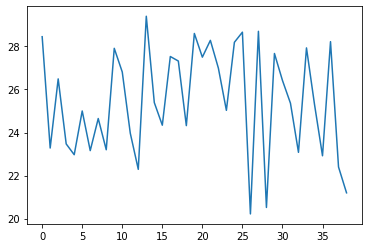

In [501]:
plt.plot(actual_data.index,actual_data) # location, labels
# plt.plot(test_y[0:10])
plt.show()

Linear error = 2.0472974587877153 %


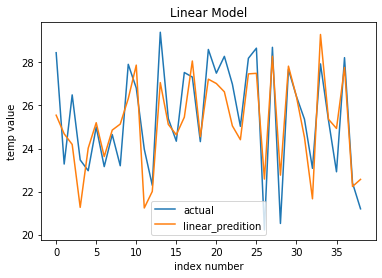

poly error = 1.5461574731091368 %


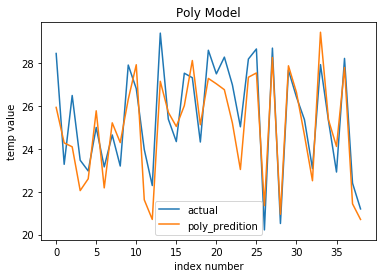

Decision Tree Model = 2.0118846153846155 %


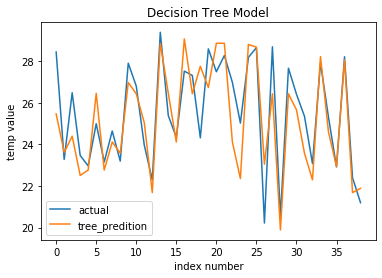

RandomForesRegression 1st Model = 0.9085432627112039 %


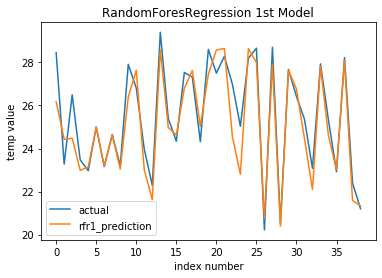

RandomForesRegression 2nd Model = 0.9014394901974699 %


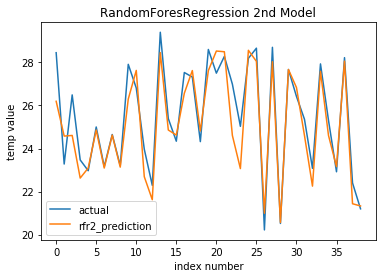

In [518]:
plt.figure(1)
plt.plot(actual_data.index,actual_data, label = "actual") 
plt.plot(linear_predition.index,linear_predition, label = "linear_predition") 
plt.xlabel('index number') 
plt.ylabel('temp value') 
plt.title('Linear Model') 
plt.legend() 
print("Linear error = {} %".format(Linear_error))
plt.show() 

plt.figure(2)
plt.plot(actual_data.index,actual_data, label = "actual") 
plt.plot(poly_predition.index,poly_predition, label = "poly_predition") 
plt.xlabel('index number') 
plt.ylabel('temp value') 
plt.title('Poly Model') 
plt.legend() 
print("poly error = {} %".format(poly_error))
plt.show() 

plt.figure(3)
plt.plot(actual_data.index,actual_data, label = "actual") 
plt.plot(tree_predition.index,tree_predition, label = "tree_predition") 
plt.xlabel('index number') 
plt.ylabel('temp value') 
plt.title('Decision Tree Model') 
plt.legend() 
print("Decision Tree Model = {} %".format(tree_error))
plt.show() 

plt.figure(4)
plt.plot(actual_data.index,actual_data, label = "actual") 
plt.plot(rfr_1st_model_predition.index,rfr_1st_model_predition, label = "rfr1_prediction") 
plt.xlabel('index number') 
plt.ylabel('temp value') 
plt.title('RandomForesRegression 1st Model') 
plt.legend() 
print("RandomForesRegression 1st Model = {} %".format(rfr_1st_model_error))
plt.show() 

plt.figure(5)
plt.plot(actual_data.index,actual_data, label = "actual") 
plt.plot(rfr_2nd_model_predition.index,rfr_2nd_model_predition, label = "rfr2_prediction")
plt.xlabel('index number') 
plt.ylabel('temp value') 
plt.title('RandomForesRegression 2nd Model') 
plt.legend() 
print("RandomForesRegression 2nd Model = {} %".format(rfr_2nd_model_error))
plt.show() 